# Naive Bayes

## Introduction

We will start by working on the Iris dataset. Recall that Iris dataset contains iris species and sepal and petal measurements. We will quickly explore the dataset and jump into Naive Bayes.

In [28]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['data']

## Question 1

* Load the Iris dataset.
* Take a quick look at the data types.
* Look at the skew values and decide if any transformations need to be applied. You can use skew value 0.75 as a threshold.
* Use `sns.pairplot` to plot the pairwise correlations and histograms. Use `hue="species"` as a keyword argument in order to see the distribution of species.

In [29]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 
filepath = os.sep.join(data_path + ['Iris_Data.csv'])
data = pd.read_csv(filepath, sep=',', header=0)

In [30]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Notice that aside from the predictor variable, everything is float.

In [31]:
skew = pd.DataFrame(data.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

/var/folders/6m/lx0jjp1d12jdshjpxl3yk6l80000gn/T/ipykernel_5876/3961844158.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew = pd.DataFrame(data.skew())


,skew,too_skewed
sepal_length,0.314911,False
sepal_width,0.334053,False
petal_length,-0.274464,False
petal_width,-0.104997,False


한쪽으로 몰려있는지 균등하게 분포돼있는지
다 false 이므로 데이터가 한 쪽으로 편향돼 있지 않다. 

Fields are not too badly skewed.

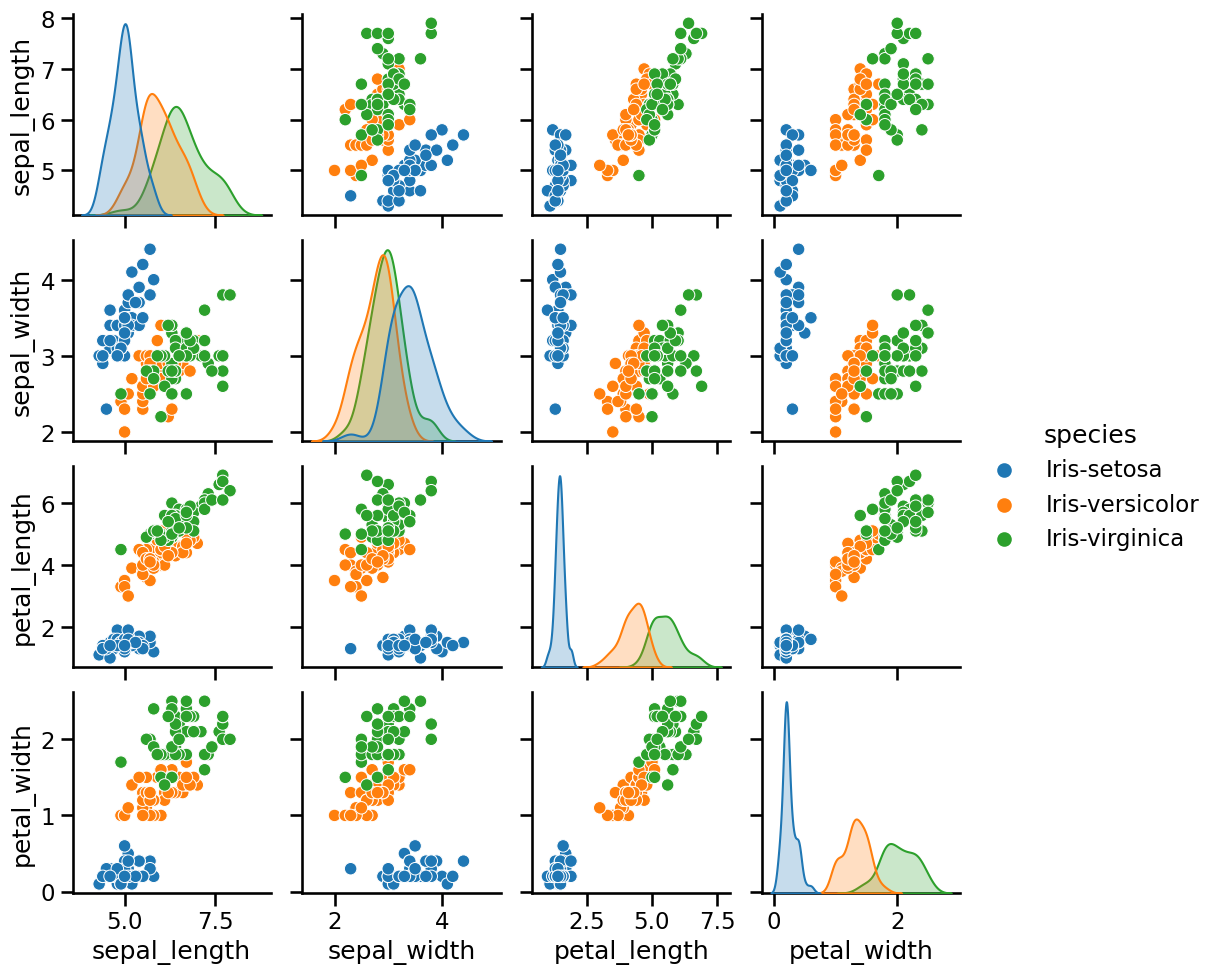

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(data, hue='species')

## Question 2

Let's now fit a Naive Bayes classifier to this data in order to predict "species".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns). Recall, choices are
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

In [33]:
# Since the features are continuous, the right choice is GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
X = data[data.columns[:-1]] # 클래스 제외 모든 특징 불러 옴
y = data.species

GNB = GaussianNB()
cv_N = 4
scores = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N) # 모델 성능 확인
print(scores)
np.mean(scores)

[0.94736842 0.94736842 0.91891892 1.        ]


0.9534139402560455

네 번의 반복 실험을 한 결과
평균

## Question 3:

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [34]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
X = data[data.columns[:-1]]
y = data.species
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.9534139402560455,
 'bernoulli': 0.3200568990042674,
 'multinomial': 0.966394025604552}

bernoulli가 굉장히 낮다. 베르누이는 데이터를 받을 때 0 또는 1로 받는다. 세 개의 클래스 중 하나 고르는 거면 33%면 거의 랜덤으로 찍는 수준. 

Looks like BernoulliNB results are very bad, but MultinomialNB is doing a very good job.

Why are the results of Bernoulli bad? Find out the reason.

## Question 4:

Let's see what happens when we take away the predictive features.

* Check the pairplot histograms (diagonal) you produced above and identify the two most predictive features visually.
* Remove the *petal_* features which are very predictive, and re-do the comparison above. That is, get the cross validation scores for all types of Naive Bayes.

In [35]:
X = data[['sepal_length', 'sepal_width']]
y = data.species

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}

scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.7933854907539118,
 'bernoulli': 0.3200568990042674,
 'multinomial': 0.6465149359886202}

성능이 떨어진 걸 볼 수 있다. 즉 특징을 뭘로 선택하느냐에 따라 성능이 좌우된다. 

#Come up with your observations after taking away the very predictive features, which model works better

## Question 5

This question explores how Naive Bayes algorithms can be affected when we push the underlying (naive) assumption too much. Recall that the naive assumption is that the features in the training set are *independent* from each other.

* Create **0, 1, 3, 5, 10, 50, 100** copies of `sepal_length` and fit a `GaussianNB` for each one.
* Keep track of the save the average `cross_val_score`.
* Create a plot of the saved scores over the number of copies.

/var/folders/6m/lx0jjp1d12jdshjpxl3yk6l80000gn/T/ipykernel_5876/4985808.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_new['sepal_length_copy%s' % i] = X['sepal_length']


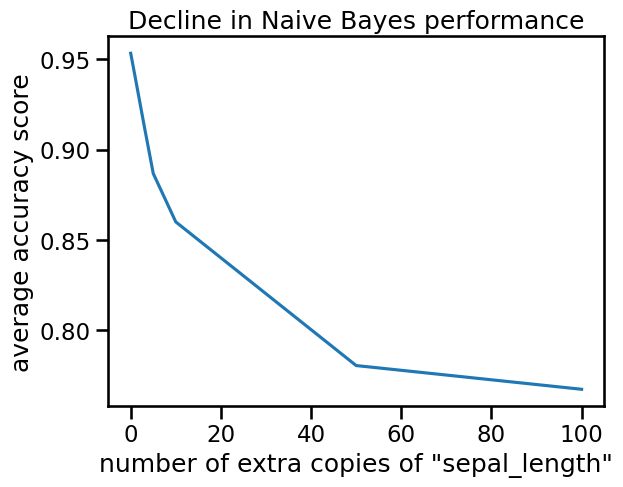

In [36]:
X = data[data.columns[:-1]]
y = data.species

n_copies = [0, 1, 3, 5, 10, 50, 100]


def create_copies_sepal_length(X, n):
    X_new = X.copy()
    for i in range(n):
        X_new['sepal_length_copy%s' % i] = X['sepal_length']
    return X_new


def get_cross_val_score(n): # 성능 체크
    X_new = create_copies_sepal_length(X, n)
    scores = cross_val_score(GaussianNB(), X_new, y, cv=cv_N, n_jobs=cv_N)
    return np.mean(scores)

avg_scores = pd.Series(
    [get_cross_val_score(n) for n in n_copies],
    index=n_copies)

ax = avg_scores.plot()
ax.set(
    xlabel='number of extra copies of "sepal_length"',
    ylabel='average accuracy score',
    title='Decline in Naive Bayes performance');


많이 복사될수록 정확도가 떨어진다. 

# Question 6

In [37]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data = pd.read_csv(filepath, sep=',')
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

X = data.drop('Activity', axis=1)
y = data.Activity
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

Text(0.5, 6.8833333333333275, 'Ground Truth')

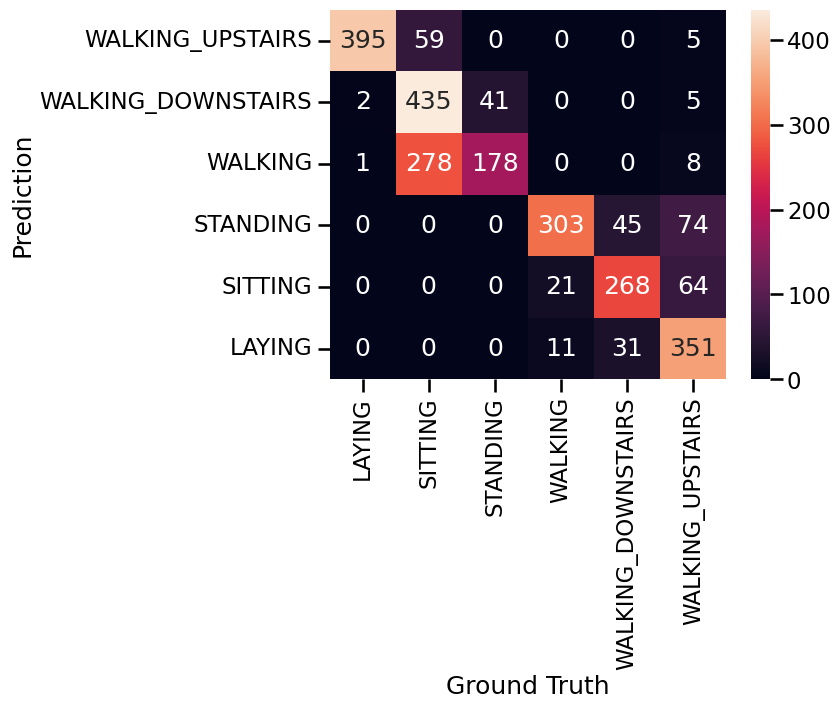

In [39]:
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
ypred = pd.Series(gnb.predict(Xtest))
labels = sorted(ytest.unique())

cm = pd.DataFrame(confusion_matrix(ytest, ypred, labels = labels),
                  columns = labels, index = labels)
sns.set_context('talk')
ax = sns.heatmap(cm, annot = True, fmt = 'd', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth')

# Question 7


In [40]:
X_discrete = X.rank(pct = True) # 각 데이터 특징에 랭킹을 매겨서 랭킹에 대해 퍼센테이지화하는 것
X_discrete.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
6585,0.857365,0.818817,0.924750,0.937373,0.889213,0.746966,0.936984,0.913001,0.665210,0.960627,...,0.806874,0.731430,0.735120,0.221284,0.986018,0.170696,0.501311,0.420332,0.704243,0.766871
248,0.193417,0.287504,0.919507,0.579377,0.793669,0.733858,0.572968,0.801825,0.777843,0.608506,...,0.628313,0.978250,0.978542,0.830760,0.111564,0.142635,0.356442,0.565492,0.875328,0.756384
9437,0.546072,0.755802,0.754345,0.133799,0.245655,0.213225,0.155743,0.247111,0.191572,0.100981,...,0.736868,0.073891,0.061754,0.609380,0.643169,0.384600,0.323818,0.042431,0.407807,0.676473
3340,0.486552,0.195747,0.780950,0.302262,0.405768,0.295466,0.320808,0.421886,0.302165,0.285125,...,0.873192,0.784736,0.832411,0.493252,0.708904,0.409554,0.220895,0.859307,0.129818,0.052918
8381,0.947082,0.134965,0.930770,0.966696,0.767356,0.843286,0.975532,0.770075,0.783863,0.922080,...,0.622973,0.887271,0.907564,0.076415,0.820856,0.143121,0.270123,0.193320,0.585688,0.565783


6122번째 특징이 전체에서 0.56%안에 들어가 있다 

In [41]:
X_discrete = X_discrete.applymap(lambda r: int(r*100))
X_discrete.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
3289,46,58,63,1,6,19,1,4,17,1,...,99,4,4,75,44,59,54,12,28,74
7870,72,2,93,50,53,51,49,53,51,52,...,8,64,62,45,70,45,49,4,29,45
8541,69,6,81,77,82,96,75,79,97,84,...,34,50,46,65,12,80,16,23,24,54
2042,83,14,82,72,61,84,74,66,87,66,...,44,13,13,6,22,6,1,65,92,27
7821,79,83,6,41,50,50,42,50,51,44,...,7,64,58,42,30,87,18,24,39,26


In [42]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_discrete, y)

mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)

MultinomialNB()

Text(0.5, 6.8833333333333275, 'Ground Truth')

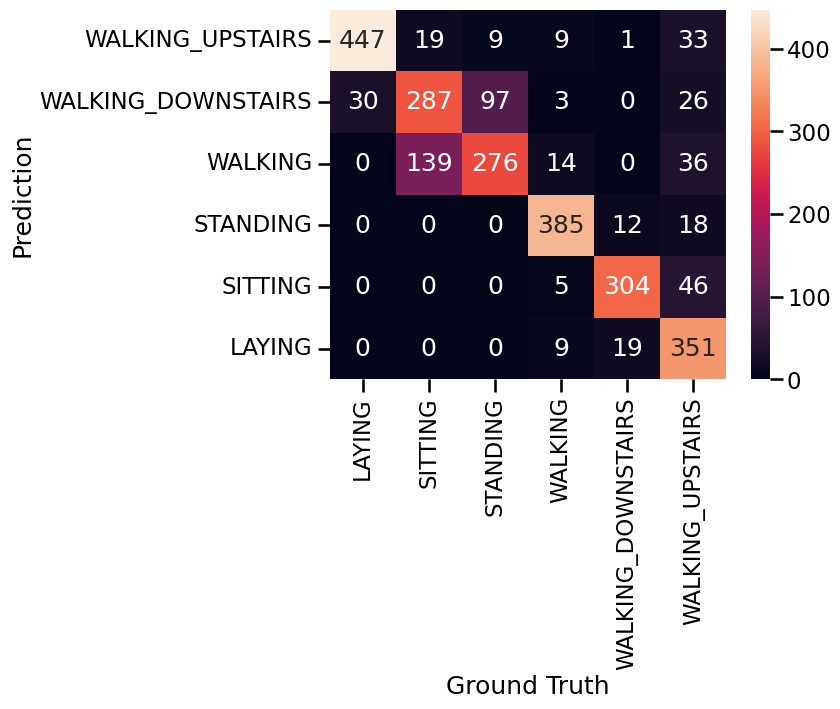

In [44]:
ypred = pd.Series(mnb.predict(Xtest))
labels = sorted(ytest.unique())

cm = pd.DataFrame(confusion_matrix(ytest, ypred, labels = labels),
                  columns = labels, index = labels)
sns.set_context('talk')
ax = sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = True, yticklabels = True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth')